## Behavioral Risk Factor Surveillance System

### Analysis

Analysis
-------------------
* Age Groups Vs Diseases
--------------
Based on the survey data, Heart Disease looks to be the most prevalent disease among all age groups calculated percent wise. 
65-69 age groups looks to be one suffering maximum from all diseases 17.5 to 20%] of people in the age groups affected with Cancer and Heart Disease being the top diseses.
QTNs?
1)Is it because the median of living retiree left work is at 62 years old, and the most common age to retire was 62 years old.
2)Also once people, retire, insurance coverage might cease to exist if not enough retirement savings.
3)It is also alarming to notice the incidence of BP as the highest disease among 18-24 age groups though they represent only around 0.5% of the total respondents. This could be due to high level of stress, anxiety or issues with unemployment?
4) Every age groups, we can almost consistenly see Blood Cholestrol as the number 1 health risk factor. IS this due to lack of healthy food habits, and lack of physical activities?

--------------------
* Gender Vs Disease Types
--------------------------
Survey data shows that men outnumber women in all health risk indicatory with Heart disease being the top most one with 73.77%. 
Women with Cancer as the top most health risk indicator with 51.66%. But as per https.Cancer.gov, https://www.cancer.gov/about-cancer/understanding/statistics
1.8% per year among men from 2006 to 2015
1.4% per year among women from 2006 to 2015
-It could be because, the sample data we have collected not actually representing the actual population.


Qtns:
1) Is it because many of contributing factors of Heart disease are Drinking, Smoking Obesity which might be common issues among Men than Women?
2) The survey data shows that Women mostly affected by Cancer though

----------------------
* Trend of Fruits and Veggie Consumption on Weight.
----------------------
-The trend shows that as the weight starts increasing fruit and veggie consumption goes down.
Qtn 1) Does that mean, 175 to 185 is the ideal weight to have? 
2) Or does it shows that our apetite has somethign to do with our weight?
3) Also people seem to eat more veggies than fruits?

----------------------------------
* Trend of Physical Activities with Weight
---------------------------------
-We see a trend that 174 to 185 lbs, people tend to exercise more and as weight increases no exercixe.
-Are people more motivated to exercixe when they weigh less?

---------------------------------------
* Trend of Drinking Habit with Weight
--------------------------------------
-There's no trend seen with number of drinks taken as weight increases.
-People in the weight category from 175 to 185 are taking on average 2 drinks per day??

-----------------------------------
* Trend of Smoking with Weight
-----------------------------------

Based on the survey data, people who smoke daily have an average weight just above 176.
But those with an average weight of 180 doesn't seem to smoke at all.
Now also see that some with an average wt of 180 refused to answer to the survey question.
Now not sure, if that means if they actually smoke or not interested in the survey.
So basically not able to find any correlation between weight and smoking habits.

-------------------------------------
* State Vs Deases
-----------------------------------
Percentage of diseases reported based on survey data shows that lowest percetgae reported is 17.86 by territory Guam followed by Vermont at 18.41%
Highest percentage is reported by Arizona at 25.98 followed by territory Puerto Rico (25.97), Maryland (25.47), LA (25.26) and Missouri (24.96) percentages.
So seems like mostly southern states have reported more diseases that central and northern states.
We can see that majority of the states that have reported highests diseases fall into the category of top 10 poorest states in US.
( Poorest states in US
Louisiana, Mississippi, New Mexico, West Virginia, Alabama, Arkansas, Kentucky, South Carolina, Arizona, and Georgia.

This indicates that more investment in health sector and educating the people in these states could be done.

---------------------
* Country level Disease percentages based on responses.
--------------------------
This suvey data, at country level shows that among the 5 diseases, Cholestrol as the biggest health risk indicator with 38.3%, 
followed with Blood Pressure at 37.5%. 
This actually falls in line with CDC's data on national average to a great extent.

Cholestrol - 71 million American adults (33.5%)

Blood Pressure - 75 million American adults (32%)

Cancer -23.2 million American Adults (9.4%)

Heart Disease - 28.2 million Americans (11.5%)

Diabetes - 30.3 million Americans Adults (9.4%)

----------------------
* BMI Vs Diseases
-----------------
Based on survey data analysis, reported disease count increases as the BMI values goes from UnderWeight to Overweight and suddenly drops. Does that means it's good to be Obese than being Overweight? Or it could be that Obesity in younger age may not still be an issues Vs in older people.

-----------------------
* Education Vs Diseases
-------------------------
Based on the survery results, we see that as people are more educated, reported diseases also increases. 
1) Education makes people aware more of their health issues?
2) Or more education, more stress and more health issues? 


#### Installing Dependencies

In [271]:
# Installing Dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import requests
import json
from pprint import pprint
import warnings
import seaborn as sns
warnings.filterwarnings('ignore')
%matplotlib inline
import plotly.io as pio
import os
# Importing so that plotly works offline
import plotly.plotly as py
import plotly.graph_objs as go 
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

from functools import reduce
from scipy import stats

# Setting up so that the figures show up in the notebook:
init_notebook_mode(connected=True) 

#### Reading the CSV into a DataFrame.

In [272]:
%%time
# reading the csv into a dataframe
file_path = "./Resources/behavioral_revised_data_final.csv"
behavior_data = pd.read_csv(file_path)

# Verifying Image directory to store images
if not os.path.exists('Images'):
    os.mkdir('Images')

Wall time: 350 ms


In [273]:
# Total count of all diseases.
# Preparing DataSet
bp_count = len(behavior_data[behavior_data["Blood Pressure"] == 'Yes'])
diabetes_count = len(behavior_data[(behavior_data["Diabetes"] == "Yes") | (behavior_data["Diabetes"] =="Borderline")])
cancer_count = len(behavior_data[behavior_data["Cancer"] =='Yes'])
chol_count = len(behavior_data[behavior_data["Cholestrol"] == 'Yes'])
heart_count = len(behavior_data[behavior_data["Heart Disease"] == 'Yes'])


#### Age Groups Vs Disease Types

In [274]:
# Calculating the percentages
bp_per = behavior_data[behavior_data["Blood Pressure"] == "Yes"].groupby("Age").count()["Blood Pressure"].astype("float64") /bp_count * 100
diabetes_per = behavior_data[behavior_data["Diabetes"] == "Yes"].groupby("Age").count()["Diabetes"].astype("float64")/ diabetes_count * 100
cancer_per = behavior_data[behavior_data["Cancer"] == "Yes"].groupby("Age").count()["Cancer"].astype("float64") / cancer_count * 100
chol_per = behavior_data[behavior_data["Cholestrol"] == "Yes"].groupby("Age").count()["Cholestrol"].astype("float64") / chol_count * 100
heart_per = behavior_data[behavior_data["Heart Disease"] == "Yes"].groupby("Age").count()["Heart Disease"].astype("float64") / heart_count * 100

# Creating the DataFrame
age_disease_data = pd.DataFrame( {"High BP" : bp_per ,"Cancer": cancer_per , 
                                  "Cholestrol" : chol_per, "Heart" : heart_per , "Diabetes" : diabetes_per})
# Formatting the DataFrame
age_disease_data_formatted = age_disease_data.applymap(lambda x: f'{x: .2f}%')
age_disease_data_formatted

,High BP,Cancer,Cholestrol,Heart,Diabetes
Age,,,,,
18-24,0.47%,0.12%,0.30%,0.09%,0.31%
25-29,0.90%,0.41%,0.79%,0.29%,0.76%
30-34,1.99%,1.13%,1.74%,0.26%,1.73%
35-39,2.59%,1.54%,2.70%,0.41%,2.72%
40-44,3.17%,1.74%,3.62%,1.22%,3.66%
45-49,4.46%,2.53%,4.94%,1.66%,4.56%
50-54,7.63%,5.43%,8.40%,4.82%,7.74%
55-59,11.48%,8.56%,12.39%,8.22%,11.45%
60-64,14.74%,12.03%,15.27%,12.90%,15.28%


In [275]:
# Setting a color scheme
color_values = { "High BP": "Coral" , "Cancer" : "lightgreen", "Cholestrol" : "gold" , "Heart" : "Cyan" , "Diabetes":"Grey"}

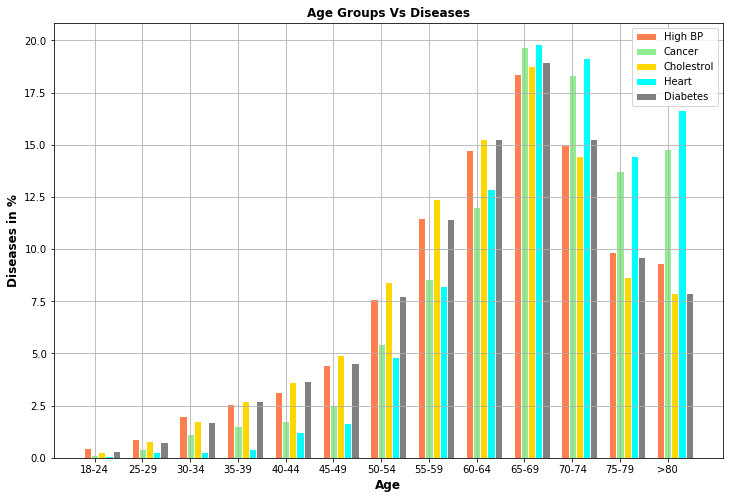

In [276]:
 #Build subplot with three rows and two columns
fig, ax  = plt.subplots(figsize=(12, 8))
#fig, ax = plt.subplots(figsize=(10,7)) 

# set width of bar
bar_width = 0.15
 
# Set position of bar on X axis
r1 = np.arange(len(age_disease_data))
r2 = [x + bar_width for x in r1]
r3 = [x + bar_width for x in r2]
r4 = [x + bar_width for x in r3] 
r5 = [x + bar_width for x in r4]

# Make the plot
plt.bar(r1, age_disease_data["High BP"], color=color_values["High BP"],  width=bar_width, edgecolor='white', label='High BP')
plt.bar(r2, age_disease_data["Cancer"], color=color_values["Cancer"] , width=bar_width, edgecolor='white', label='Cancer')
plt.bar(r3, age_disease_data["Cholestrol"], color=color_values["Cholestrol"], width=bar_width, edgecolor='white', label='Cholestrol')
plt.bar(r4, age_disease_data["Heart"], color=color_values["Heart"], width=bar_width, edgecolor='white', label='Heart')
plt.bar(r5, age_disease_data["Diabetes"], color=color_values["Diabetes"],  width=bar_width, edgecolor='white', label='Diabetes')

# Add xticks on the middle of the group bars
plt.xlabel("Age", fontweight='bold' , fontsize = 'large')
plt.xticks([r + bar_width for r in range(len(age_disease_data))], age_disease_data.index)
plt.title("Age Groups Vs Diseases", fontweight='bold', fontsize='large')
plt.ylabel("Diseases in %", fontweight='bold', fontsize = 'large')
plt.grid()
 
# Create legend & Show graphic
lgnd = plt.legend()

fig.savefig("./Images/age_disease.png")


plt.show()

#### Gender Vs Disease Types

In [277]:
# Calculating the Percentages
bp_per_sex = behavior_data[behavior_data["Blood Pressure"] == "Yes"].groupby("Sex").count()["Blood Pressure"].astype("float64") /bp_count * 100
diabetes_per_sex = behavior_data[behavior_data["Diabetes"] == "Yes"].groupby("Sex").count()["Diabetes"].astype("float64")/ diabetes_count * 100
cancer_per_sex = behavior_data[behavior_data["Cancer"] == "Yes"].groupby("Sex").count()["Cancer"].astype("float64") / cancer_count * 100
chol_per_sex = behavior_data[behavior_data["Cholestrol"] == "Yes"].groupby("Sex").count()["Cholestrol"].astype("float64") / chol_count * 100
heart_per_sex = behavior_data[behavior_data["Heart Disease"] == "Yes"].groupby("Sex").count()["Heart Disease"].astype("float64") / heart_count * 100

# Creating the DataFrame
sex_disease_data = pd.DataFrame( {"High BP" : bp_per_sex ,"Cancer": cancer_per_sex , 
                                  "Cholestrol" : chol_per_sex, "Heart" : heart_per_sex , "Diabetes" : diabetes_per_sex})
# Formatting the DataFrame
sex_disease_data_formatted = sex_disease_data.applymap(lambda x: f'{x: .2f}%')
sex_disease_data_formatted

,High BP,Cancer,Cholestrol,Heart,Diabetes
Sex,,,,,
Female,41.76%,51.66%,44.54%,26.23%,38.39%
Male,58.24%,48.34%,55.46%,73.77%,61.61%


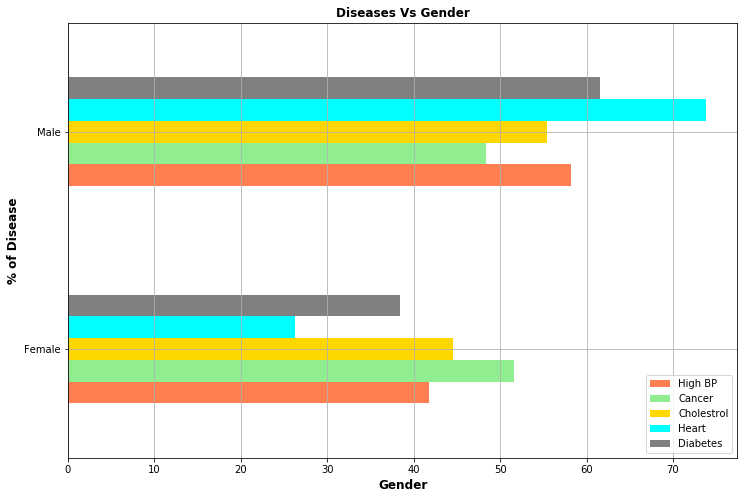

In [278]:
#Plot for Gender Vs Diseases
fig, ax  = plt.subplots(figsize=(12, 8))

sex_disease_data.plot(kind="barh", ax=ax, colors = ["Coral", "lightgreen", "gold", "Cyan", "grey"])

plt.title('Diseases Vs Gender', fontweight="bold", fontsize="large")
plt.xlabel('Gender',  fontweight="bold", fontsize="large")
plt.ylabel("% of Disease", fontweight="bold", fontsize="large")
plt.grid()


fig.savefig("./Images/gender_disease.png")

plt.show()

#### Impact of Habits on Weight

In [279]:
# Creating the dataset
grouped_data = behavior_data.groupby("State").mean()
fruits_avg_state = grouped_data["Fruits/Day"]
weight_avg_state = grouped_data["Weight(lbs)"]
vegg_avg_state = grouped_data["Vegetables/Day"]
avg_physical_activity = grouped_data["Physical Activity/Day(mints)"]
avg_alcohol = grouped_data["Alcohol/Day"]

* Trend of Fruits and Veggie Consumption on Weight.

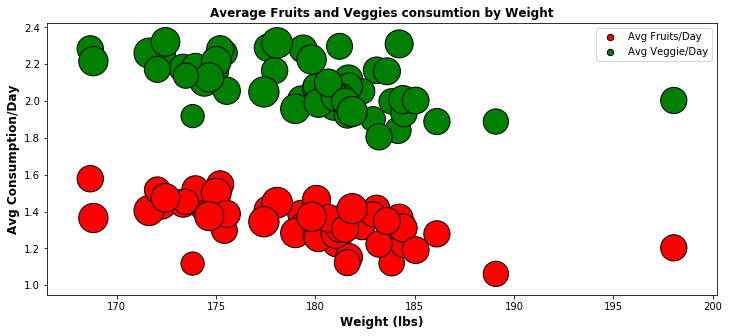

In [280]:
fig, ax  = plt.subplots(figsize=(12, 5))
y = fruits_avg_state 
x = weight_avg_state
y1 = vegg_avg_state
# Drawing the scatter plot
plt.scatter(x,y, s= avg_physical_activity * 10,  marker='o', facecolor='red', edgecolor="black")
plt.scatter( x, y1,  s= avg_physical_activity * 10, marker='o', color='green', edgecolor="black")

plt.xlabel("Weight (lbs)", fontweight="bold", fontsize="large")
plt.ylabel("Avg Consumption/Day",fontweight="bold", fontsize="large")
lgnd = plt.legend(['Avg Fruits/Day', 'Avg Veggie/Day'])
for handle in lgnd.legendHandles:
    handle.set_sizes([40.0])
plt.title("Average Fruits and Veggies consumtion by Weight", fontweight="bold",fontsize="large")


fig.savefig("./Images/fruit_veggie_wt.png")

plt.show()

* Trend of Physical Activities with Weight

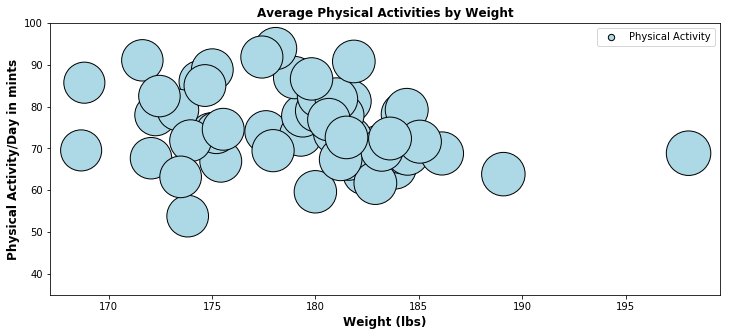

In [281]:
fig, ax  = plt.subplots(figsize=(12, 5))
y = avg_physical_activity
x = weight_avg_state
plt.scatter(x,y,s= weight_avg_state * 10 , marker='o',  facecolors="lightblue", edgecolors="black" , label = "Physical Activity")

plt.xlabel("Weight (lbs)", fontweight = "bold" , fontsize="large")
plt.ylabel("Physical Activity/Day in mints", fontweight = "bold" , fontsize="large")
plt.title("Average Physical Activities by Weight", fontweight = "bold" , fontsize="large")
plt.ylim(35,100)

lgnd = plt.legend()
for handle in lgnd.legendHandles:
    handle.set_sizes([40.0])
    
fig.savefig("./Images/physical_wt.png")
plt.show()


* Trend of Drinking Habit with Weight

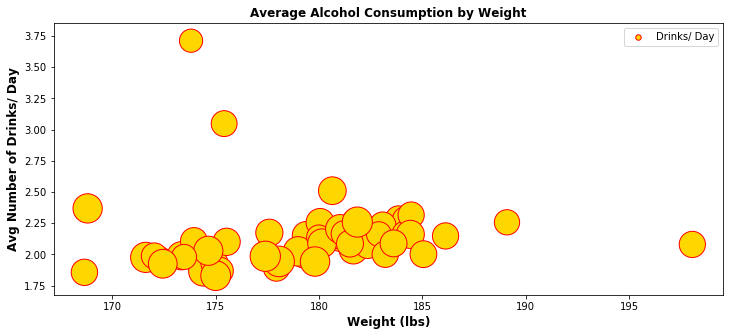

In [282]:
fig, ax  = plt.subplots(figsize=(12, 5))
y = avg_alcohol
x = weight_avg_state
plt.scatter(x,y, s= avg_physical_activity * 10, marker='o',  facecolors="Gold", edgecolors="red" ,label = "Drinks/ Day")

plt.xlabel("Weight (lbs)", fontweight="bold", fontsize="large")
plt.ylabel("Avg Number of Drinks/ Day", fontweight="bold", fontsize="large")
# plt.legend(['Avg Physical Activity/Day'])
plt.title("Average Alcohol Consumption by Weight", fontweight="bold", fontsize="large")
lgnd = plt.legend()
for handle in lgnd.legendHandles:
    handle.set_sizes([30.0])
    
fig.savefig("./Images/alcohol_wt.png")
    
plt.show()

* Trend of Smoking with Weight

In [283]:
# Fathering Data
grouped_smoking = behavior_data.groupby(["Smoking"]).mean()
grouped_smoking = grouped_smoking.reindex(["Not at all", "Some days", "Every day"])



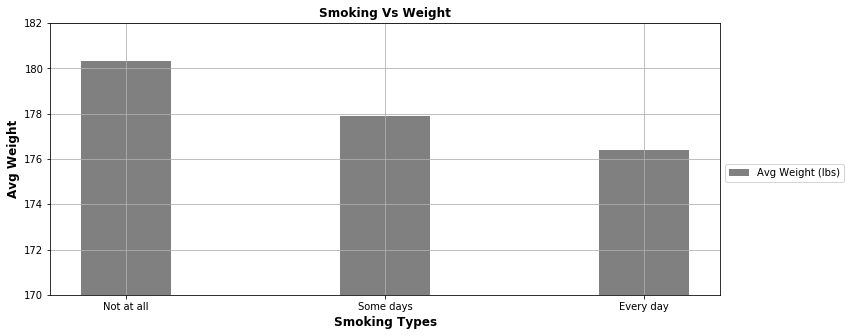

In [284]:
fig, ax  = plt.subplots(figsize=(12, 5))
width = 0.35
p1 = plt.bar(grouped_smoking.index, grouped_smoking["Weight(lbs)"],  width , color="gray" )
plt.legend(["Avg Weight (lbs)"], bbox_to_anchor=(1, 0.5))
plt.ylim(170,182)
plt.xlabel("Smoking Types", fontweight="bold", fontsize="large")
plt.ylabel("Avg Weight", fontweight="bold", fontsize="large")
plt.title("Smoking Vs Weight", fontweight="bold", fontsize="large")
plt.grid()
fig.savefig("./Images/smoking_wt.png")
plt.show()

#### State Vs Diseases

In [285]:
# Gathering the data.
state_disease_all = behavior_data.groupby("State Code").count()["Cancer"] + \
                      behavior_data.groupby("State Code").count()["Blood Pressure"] + \
                      behavior_data.groupby("State Code").count()["Cholestrol"] + \
                      behavior_data.groupby("State Code").count()["Heart Disease"] + \
                      behavior_data.groupby("State Code").count()["Diabetes"]

state_disease_cancer  = behavior_data[behavior_data["Cancer"] == "Yes"].groupby("State Code").count()["Cancer"]
state_disease_bp      = behavior_data[behavior_data["Blood Pressure"] == "Yes"].groupby("State Code").count()["Blood Pressure"]
state_disease_chol    = behavior_data[behavior_data["Cholestrol"] == "Yes"].groupby("State Code").count()["Cholestrol"]
state_disease_heart   = behavior_data[behavior_data["Heart Disease"] == "Yes"].groupby("State Code").count()["Heart Disease"]
state_disease_diabetes = behavior_data[behavior_data["Diabetes"] == "Yes"].groupby("State Code").count()["Diabetes"]

# Processing Data to calculate total disease percentage by states.
state_disease_yes = state_disease_cancer + state_disease_bp + state_disease_chol + state_disease_heart + state_disease_diabetes
state_disease_perc = round(state_disease_yes / state_disease_all  * 100,2).sort_values()
state_perc_top5 = state_disease_perc.head(10)
state_perc_least5 = state_disease_perc.tail(10)
state_disease_perc = pd.DataFrame(state_disease_perc, columns=["Total Disease %"])
print("Top 5 healthy States")
state_disease_perc.head(5)


Top 5 healthy States


,Total Disease %
State Code,
GU,17.86
VT,18.41
UT,19.44
CO,19.83
MN,20.26


In [286]:
print("Least 5 healthy States")
state_disease_perc.tail(5)


Least 5 healthy States


,Total Disease %
State Code,
MS,24.96
LA,25.26
MD,25.47
PR,25.97
AR,25.98


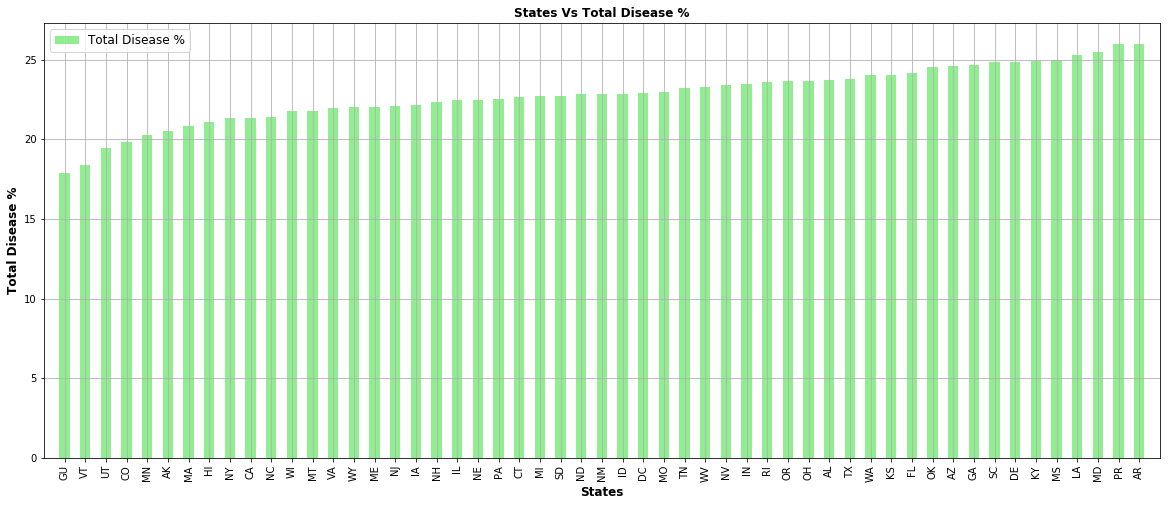

In [287]:
# Plotting line plot
fig, ax  = plt.subplots(figsize=(20, 8))
lp = state_disease_perc.plot(kind="bar",ax = ax , color = "lightgreen" , grid=True)
lp.set_xlabel("States" , fontweight="bold", fontsize="large")
lp.set_ylabel("Total Disease %", fontweight="bold", fontsize="large")
lp.set_xlim(-1,53)
lp.set_title("States Vs Total Disease %", fontweight="bold", fontsize="large")
plt.legend(fontsize="large", fancybox=True)
plt.show()

#### Finding the Top 10 Healthy States based on Reported Diseases.

In [288]:
# Now out data dictionary with some extra marker and colorbar arguments:
data = dict(type='choropleth',
            colorscale = 'Portland',
            reversescale = True,
            locations = state_perc_least5.index,
            z = state_perc_least5.values,
            locationmode = 'USA-states',
            text = state_perc_least5.index,
            marker = dict(line = dict(color = 'rgb(255,255,255)',width = 1)),
            colorbar = {'title':"Diseases %"}
            ) 

In [289]:
# And our layout dictionary with some more arguments:
layout = dict(title = 'Least 10 Healthy States by percentage of reported Diseases.',
              geo = dict(scope='usa',
                         showlakes = True,
                         lakecolor = 'rgb(85,170,255)')
             )

In [290]:
choromap = go.Figure(data = [data],layout = layout)
# plot(choromap,validate=False)
iplot(choromap)
pio.write_image(choromap, './Images/least_healthy_10.png')

#### Finding the Least 10 Healthy States based on Reported Diseases.

In [291]:
# Now out data dictionary with some extra marker and colorbar arguments:
data = dict(type='choropleth',
            colorscale = 'Portland',
            reversescale = True,
            locations = state_perc_top5.index,
            z = state_perc_top5.values,
            locationmode = 'USA-states',
            text = state_perc_top5.index,
            marker = dict(line = dict(color = 'rgb(255,255,255)',width = 1)),
            colorbar = {'title':"Diseases %"}
            ) 

In [292]:
# And our layout dictionary with some more arguments:
layout = dict(title = 'Top 10 Healthy States by percentage of reported Diseases.',
              geo = dict(scope='usa',
                         showlakes = True,
                         lakecolor = 'rgb(85,170,255)')
             )

In [293]:
choromap = go.Figure(data = [data],layout = layout)
# plot(choromap,validate=False)
iplot(choromap)
pio.write_image(choromap, './Images/top_healthy_10.png')

#### Country level Disease percentages based on responses.

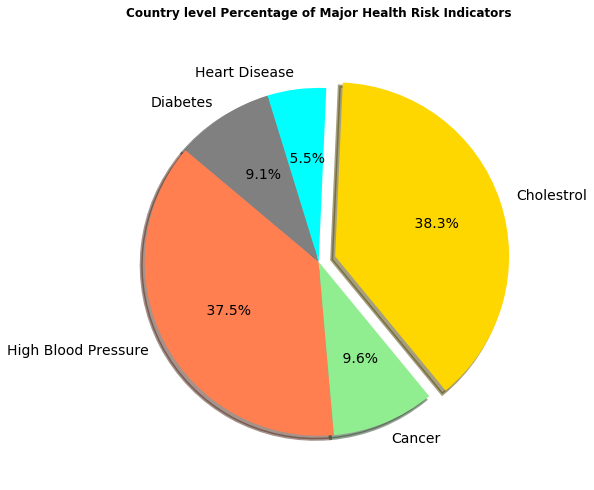

In [294]:
# Gathering Data and plotting Pie chart
fig, ax  = plt.subplots(figsize=(12, 8))

total_respondents = behavior_data.count()[0]

cancer_perc = cancer_count / total_respondents * 100
bp_perc =  bp_count / total_respondents * 100
chol_perc = chol_count / total_respondents * 100
heart_perc = heart_count / total_respondents * 100
diabetes_perc = diabetes_count / total_respondents * 100

disease_perc = [ bp_perc, cancer_perc, chol_perc , heart_perc , diabetes_perc]
pies = ["High Blood Pressure" ,"Cancer", "Cholestrol" , "Heart Disease", "Diabetes"]
#color_values = { "BP": "Coral" , "Cancer" : "lightgreen", "Cholestrol" : "gold" , "Heart" : "Cyan" , "Diabetes":"Grey"}
colors = ["Coral","lightgreen","gold","Cyan","Grey"]
# colors = ["Coral", "lightgreen", "gold", "yellowgreen", "grey"]

explode = (0,0,0.1,0,0)
          
# Tell matplotlib to create a pie chart based upon the above data
plt.pie(disease_perc, explode=explode, labels=pies, colors=colors, autopct=lambda x: f'{x: .1f}%', 
        shadow=True, startangle=140, wedgeprops = {'linewidth': 3}, textprops={'fontsize': 14})

# Create axes which are equal so we have a perfect circle
# plt.axis("equal")
ttl = plt.title("Country level Percentage of Major Health Risk Indicators", fontweight="bold", fontsize="large")
ttl.set_position([.5, 1.05])

# Save an image of our chart and print the final product to the screen

fig.savefig("./Images/DieseasesPie.png")

plt.show()

In [295]:
behavior_data.head()

,State,State Code,Sex,Marital Status,Age,Race,Education,Weight(lbs),Height(ft),Income,...,Physical Activity/Day(mints),Smoking,Alcohol/Day,BMI,Blood Pressure,Cholestrol,Heart Disease,Stroke,Cancer,Diabetes
0,Alabama,AL,Female,Widowed,70-74,White only,High School,128.0,4.99980,20000-25000,...,30.0,Every day,2.0,Overweight,Yes,Yes,No,No,No,No
1,Alabama,AL,Male,Married,>80,White only,College 4yrs,172.0,5.83310,>75000,...,40.0,Not at all,1.0,Normal Weight,No,No,No,No,No,Yes
2,Alabama,AL,Male,Married,50-54,White only,College 3yrs,135.0,5.33312,35000-50000,...,308.0,Every day,1.0,Normal Weight,No,No,No,No,No,Yes
3,Alabama,AL,Male,Married,35-39,White only,College 3yrs,190.0,5.99976,15000-20000,...,20.0,Every day,1.0,Overweight,No,No,No,No,No,No
4,Alabama,AL,Male,Married,65-69,White only,College 4yrs,212.0,5.91643,Refused,...,150.0,Not at all,1.0,Overweight,Yes,Yes,Yes,Yes,No,No


#### Finding any Correlation

In [296]:
behavior_data.corr()


,Weight(lbs),Height(ft),Vegetables/Day,Fruits/Day,Physical Activity/Day(mints),Alcohol/Day
Weight(lbs),1.000000,0.543545,-0.092949,-0.079872,-0.043625,0.134069
Height(ft),0.543545,1.000000,-0.077631,-0.046853,0.020995,0.162509
Vegetables/Day,-0.092949,-0.077631,1.000000,0.372376,0.051116,-0.065677
Fruits/Day,-0.079872,-0.046853,0.372376,1.000000,0.050804,-0.085544
Physical Activity/Day(mints),-0.043625,0.020995,0.051116,0.050804,1.000000,-0.017736
Alcohol/Day,0.134069,0.162509,-0.065677,-0.085544,-0.017736,1.000000


#### BMI Vs Diseases

In [297]:
cancer_by_bmi = behavior_data[behavior_data["Cancer"] == "Yes"].groupby("BMI").count()["Cancer"]
bp_by_bmi = behavior_data[behavior_data["Blood Pressure"] == "Yes"].groupby("BMI").count()["Blood Pressure"]
chol_by_bmi = behavior_data[behavior_data["Cholestrol"] == "Yes"].groupby("BMI").count()["Cholestrol"]
heart_by_bmi = behavior_data[behavior_data["Heart Disease"] == "Yes"].groupby("BMI").count()["Heart Disease"]
diabetes_by_bmi = behavior_data[behavior_data["Diabetes"] == "Yes"].groupby("BMI").count()["Diabetes"]
bmis = [cancer_by_bmi, bp_by_bmi, chol_by_bmi , heart_by_bmi, diabetes_by_bmi]
bmi_final = reduce(lambda left,right: pd.merge(left,right,on='BMI'), bmis)
bmi_final = bmi_final.reindex(["Underweight", "Normal Weight", "Overweight", "Obese"]).rename(columns={"Blood Pressure":"High Blood Pressure"})
bmi_final

,Cancer,High Blood Pressure,Cholestrol,Heart Disease,Diabetes
BMI,,,,,
Underweight,79,177,159,28,25
Normal Weight,2075,5658,6423,811,941
Overweight,2490,9953,10541,1474,2185
Obese,1393,7883,7074,1129,2614


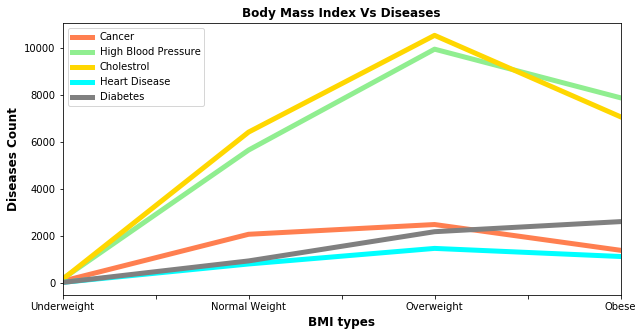

In [298]:
fig, ax = plt.subplots(figsize=(10, 5) )
p1 = bmi_final.plot(ax=ax, lw= 5, colors = ["Coral","lightgreen","gold","Cyan","Grey"])
p1.set_xlabel("BMI types" ,fontweight = "bold", fontsize="large")
p1.set_ylabel("Diseases Count", fontweight = "bold", fontsize="large")
p1.set_title("Body Mass Index Vs Diseases", fontweight="bold", fontsize="large")
fig.savefig("./Images/bmi_diseases.png")
plt.show()


#### Education Vs Diseases

In [299]:
cancer_by_education = behavior_data[behavior_data["Cancer"] == "Yes"].groupby("Education").count()["Cancer"]
bp_by_education = behavior_data[behavior_data["Blood Pressure"] == "Yes"].groupby("Education").count()["Blood Pressure"]
chol_by_education = behavior_data[behavior_data["Cholestrol"] == "Yes"].groupby("Education").count()["Cholestrol"]
heart_by_education = behavior_data[behavior_data["Heart Disease"] == "Yes"].groupby("Education").count()["Heart Disease"]
diabetes_by_education = behavior_data[behavior_data["Diabetes"] == "Yes"].groupby("Education").count()["Diabetes"]
edus = [cancer_by_education, bp_by_education, chol_by_education , heart_by_education, diabetes_by_education]
education_final = reduce(lambda left,right: pd.merge(left,right,on='Education'), edus)
education_final = education_final.reindex(["No School", "Elementary", "Junior High", "High School", "College 3yrs" ,"College 4yrs"]).rename(columns={"Blood Pressure":"High Blood Pressure"})
education_final

,Cancer,High Blood Pressure,Cholestrol,Heart Disease,Diabetes
Education,,,,,
No School,2,7,6,1,2
Elementary,42,211,205,31,82
Junior High,129,715,645,114,199
High School,1296,5840,5606,822,1462
College 3yrs,1699,7099,7046,1018,1817
College 4yrs,2864,9782,10671,1450,2197


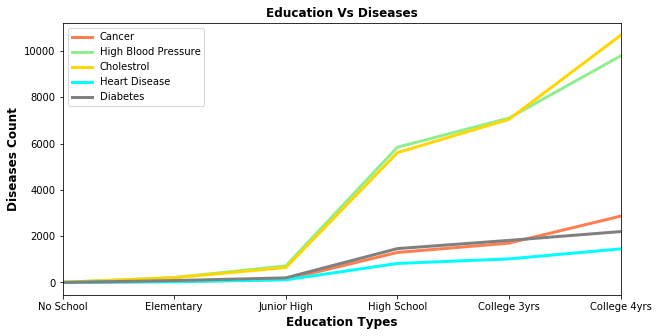

In [300]:
fig, ax = plt.subplots(figsize=(10, 5))
p1 = education_final.plot(ax=ax, lw= 3 , colors = ["Coral","lightgreen","gold","Cyan","Grey"])
p1.set_xlabel("Education Types" ,fontweight = "bold", fontsize="large")
p1.set_ylabel("Diseases Count", fontweight = "bold", fontsize="large")
p1.set_title("Education Vs Diseases", fontweight="bold", fontsize="large")
fig.savefig("./Images/education_diseases.png")
plt.show()